In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv('training.csv',encoding='latin1')
data.columns=["Label","ID","Time","Query","Username","Tweet"]

In [3]:
data.head()

,Label,ID,Time,Query,Username,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
data.head(5)

,Label,ID,Time,Query,Username,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
#label_encoder= preprocessing.LabelEncoder()
#data['Affect Dimension']= label_encoder.fit_transform(data['Affect Dimension'])
#data['Affect Dimension'].unique()

In [6]:
data.drop("Time", axis=1, inplace=True)
data.drop("Query", axis=1, inplace=True)
data.drop("Username", axis=1, inplace=True)
data.drop("ID", axis=1, inplace=True)
data.head()

,Label,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Label   1048575 non-null  int64 
 1   Tweet   1048575 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.0+ MB


In [8]:
data.shape
data['Label'].value_counts()

0    799999
4    248576
Name: Label, dtype: int64

In [9]:
#cleaning text
import nltk
import string
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()



def CleanTxt(text):
    #text= str(text).lower() #lowercase
    text= re.sub(r'@[A-Za-z0-9]+','',text)
    text= re.sub(r'\_[A-Za-z0-9]+','',text) #remove mentions
    text= re.sub(r'#','',text) #remove hashtag
    text= re.sub(r'http:s?//\S+|www\.\S+','',text) #remove hyperlinks 
    #text = re.sub("(.)\\1{2,}", "\\1", text)
    
    #text= text.translate(str.maketrans('','',string.punctuation)) #remove punctuations
   
    
    return text

data['Tweet_clean']= data['Tweet'].apply(CleanTxt)

data.head()

,Label,Tweet,Tweet_clean
0,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am..."
4,0,@Kwesidei not the whole crew,not the whole crew


stop_words= set (stopwords.words("english"))
def lem(txt):
    
    txt_token= word_tokenize(txt)
    txt= [word for word in txt_token if word not in stop_words]
    
    return " ".join(txt)

data['Tweet_lema']= data['Tweet_clean'].apply(lem)
data.head()

In [10]:
#lemmatization
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map={"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}


def lemmatize_words(txt):
    txt= str(txt).lower()
    pos_tagged_txt= nltk.pos_tag(txt.split())
    txt= " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_txt])
    return txt
data["Tweet_lema"]= data["Tweet_clean"].apply(lambda text:lemmatize_words(text))
data.head()

,Label,Tweet,Tweet_clean,Tweet_lema
0,0,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...,be upset that he can't update his facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...,I dived many times for the ball. Managed to s...,i dive many time for the ball. manage to save ...
2,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...","no, it's not behave at all. i'm mad. why be i ..."
4,0,@Kwesidei not the whole crew,not the whole crew,not the whole crew


In [11]:
contractions_dict = { 
" u ":"you",    
"&":"and",    
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"wot":"what",
"wtf":"what the fuck",
"wth":"what thw hell",    
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"pics":"pictures"    
}

In [12]:
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)
data.drop("Tweet_clean", axis=1, inplace=True)
data["Tweet_lema"]= data["Tweet_lema"].apply(lambda text:expand_contractions(text))
data.head(148)
        
    

,Label,Tweet,Tweet_lema
0,0,is upset that he can't update his Facebook by ...,be upset that he cannot update his facebook by...
1,0,@Kenichan I dived many times for the ball. Man...,i dive many time for the ball. manage to save ...
2,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,"@nationwideclass no, it's not behaving at all....","no, it is not behave at all. i'm mad. why be i..."
4,0,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
143,0,laid around too much today... now my head hurts,lay around too much today... now my head hurt
144,0,@twista202 I still haven't read the 9th&amp;10...,i still have not read the 9thandamp;10th princ...
145,0,my nokia 1110 died..,my nokia 1110 died..
146,0,My mom might have breast cancer won't find out...,my mom might have breast cancer will not find ...


In [13]:
def remove_punc(text):
    text= text.translate(str.maketrans('','',string.punctuation)) #remove punctuations
    return text
data["Tweet_lema"]= data["Tweet_lema"].apply(lambda text:remove_punc(text))
data.head(148)

,Label,Tweet,Tweet_lema
0,0,is upset that he can't update his Facebook by ...,be upset that he cannot update his facebook by...
1,0,@Kenichan I dived many times for the ball. Man...,i dive many time for the ball manage to save 5...
2,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it is not behave at all im mad why be i her...
4,0,@Kwesidei not the whole crew,not the whole crew
...,...,...,...
143,0,laid around too much today... now my head hurts,lay around too much today now my head hurt
144,0,@twista202 I still haven't read the 9th&amp;10...,i still have not read the 9thandamp10th prince...
145,0,my nokia 1110 died..,my nokia 1110 died
146,0,My mom might have breast cancer won't find out...,my mom might have breast cancer will not find ...


In [14]:
from string import printable
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [15]:
from string import printable
#prntable
#removing emojis
data["Tweet_lema"]=data["Tweet_lema"].apply(lambda y: ''.join(filter(lambda x:  x in string.printable, y)))
data.head(20)

,Label,Tweet,Tweet_lema
0,0,is upset that he can't update his Facebook by ...,be upset that he cannot update his facebook by...
1,0,@Kenichan I dived many times for the ball. Man...,i dive many time for the ball manage to save 5...
2,0,my whole body feels itchy and like its on fire,my whole body feel itchy and like it on fire
3,0,"@nationwideclass no, it's not behaving at all....",no it is not behave at all im mad why be i her...
4,0,@Kwesidei not the whole crew,not the whole crew
5,0,Need a hug,need a hug
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rain a bit only a bit...
7,0,@Tatiana_K nope they didn't have it,nope they did not have it
8,0,@twittera que me muera ?,que me muera
9,0,spring break in plain city... it's snowing,spring break in plain city it is snow


stop_words= set (stopwords.words("english"))
def lem(txt):
    
    #txt= word_tokenize(txt)
    txt= " ".join([word for word in (txt).split() if word not in stop_words])
    
    return txt

data['Tweet_lema']= data['Tweet_lema'].apply(lem)
data.head()

In [16]:
from collections import Counter
cnt= Counter()
for text in data["Tweet_lema"].values:
    for word in text.split():
        cnt[word]+=1
        
        
cnt.most_common(10)

[('i', 551099),
 ('be', 431536),
 ('to', 391789),
 ('the', 339836),
 ('a', 262562),
 ('it', 229837),
 ('my', 227431),
 ('and', 196471),
 ('not', 184914),
 ('have', 180635)]

In [17]:
freq_words= set([w for (w, wc)in cnt.most_common(8)])

def remove_freq(txt):
    txt= " ".join([word for word in str(txt).split() if word not in freq_words])
    return txt
data["Tweet_lema"]= data["Tweet_lema"].apply(lambda text:remove_freq(text))
data.head(48)

,Label,Tweet,Tweet_lema
0,0,is upset that he can't update his Facebook by ...,upset that he cannot update his facebook by te...
1,0,@Kenichan I dived many times for the ball. Man...,dive many time for ball manage save 50 rest go...
2,0,my whole body feels itchy and like its on fire,whole body feel itchy like on fire
3,0,"@nationwideclass no, it's not behaving at all....",no is not behave at all im mad why here becaus...
4,0,@Kwesidei not the whole crew,not whole crew
5,0,Need a hug,need hug
6,0,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time no see yes rain bit only bit lol...
7,0,@Tatiana_K nope they didn't have it,nope they did not have
8,0,@twittera que me muera ?,que me muera
9,0,spring break in plain city... it's snowing,spring break in plain city is snow


0= negative, 4=positive


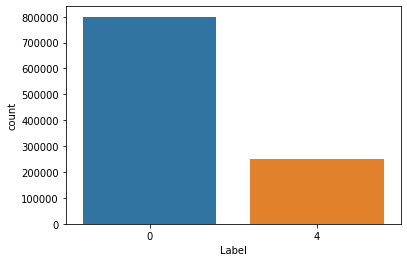

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("0= negative, 4=positive")
a= sns.countplot(x=data['Label'], data=data, order= data['Label'].value_counts().index)

plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf=TfidfVectorizer()
X= data['Tweet_lema']
y=data['Label']

X=Tfidf.fit_transform(X)


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1)

In [22]:
text_clf= LinearSVC()
text_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [23]:
pred= text_clf.predict(X_test)

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90    160045
           4       0.73      0.53      0.61     49670

    accuracy                           0.84    209715
   macro avg       0.80      0.73      0.76    209715
weighted avg       0.83      0.84      0.83    209715



In [29]:
text="i am happy"
data=sent_tokenize(text)
data
abc=Tfidf.transform(data)
pred1= text_clf.predict(abc)
print (pred1)
print("0= negative, 4=positive")


[4]
0= negative, 4=positive


In [59]:
import tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
from time import sleep
import pandas as pd


#consumer key, consumer secret, access token, access secret.
ckey="FpamlkWTozRZhZj1kT8yhZETQ"
csecret="7schRUjNUMnccuyoS54OiYA0Ltbulimu2pFhusAbBrg6H43W9u"
atoken="1601550698-GfqGB1XueHbOFZKUNeJu3RitRtzOTVdB0GDqHfV"
asecret="qiJkpq9WrumCtjMHOR6UG9buJBQyheLS1FjPsXwaSj4KN"

auth = tweepy.OAuthHandler(ckey, csecret)
auth.set_access_token(atoken,asecret)
api = tweepy.API(auth)

searchTerm = input("enter hashtag for search: ")
no_searchTerms = int(input("enter number of tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=searchTerm, lang="en").items(no_searchTerms)

tweet_list=[tweet for tweet in tweets]
noTweet=0
text=[]
for tweet in tweet_list:
    text.append(tweet.text)
   
text

df= pd.DataFrame(text)
df.columns=['Tweet']
df
#for tweet in tweets:
   # print(tweet.text)

#print(tweet.text)

enter hashtag for search: #covid19
enter number of tweets to analyze: 2


,Tweet
0,RT @DrRJSimpson: I was surprised at some of th...
1,RT @guebrayberhane: Today is Abolition of #Sla...


In [60]:
#cleaning text
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import nltk
import string
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()



def CleanTxt(text):
    #text= str(text).lower() #lowercase
    text= re.sub(r'@[A-Za-z0-9\:]+','',text)
    text= re.sub(r'\_[A-Za-z0-9]+','',text) #remove mentions
    text= re.sub(r'#','',text) #remove hashtag
    text= re.sub(r'RT','',text) #remove hashtag
    text= re.sub(r'http\S+|www\.\S+','',text) #remove hyperlinks 
    text = re.sub("(.)\\1{2,}", "\\1", text)
    
    text= text.translate(str.maketrans('','',string.punctuation)) #remove punctuations
   
    
    return text

df['Tweet_clean']= df['Tweet'].apply(CleanTxt)

df.head()

,Tweet,Tweet_clean
0,RT @DrRJSimpson: I was surprised at some of th...,I was surprised at some of the responses to ...
1,RT @guebrayberhane: Today is Abolition of #Sla...,Today is Abolition of Slavery Day\n\nModern ...


In [61]:
list1=[]
for tweet in df['Tweet_clean']:
    list1.append(tweet)
    
list1

['  I was surprised at some of the responses to my comments on the £500 bonus\nI think the scottish Parliament Audit committee…',
 '  Today is Abolition of Slavery Day\n\nModern Slavery still affects 403 million people making them even more vulnerable…']

In [62]:
s=no_searchTerms
for n in range(s) :
    print (list1[n])
    data1=list1[n]
    data=sent_tokenize(data1)
    abc=Tfidf.transform(data)
    pred12= text_clf.predict(abc)
    print(pred12)
    

print("0= negative, 4=positive")

  I was surprised at some of the responses to my comments on the £500 bonus
I think the scottish Parliament Audit committee…
[4]
  Today is Abolition of Slavery Day

Modern Slavery still affects 403 million people making them even more vulnerable…
[0]
0= negative, 4=positive
